In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('C:/Users/uim/Desktop/weatherHistory.csv')
print(df)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
5      2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain   
6      2006-04-01 06:00:00.000 +0200  Partly Cloudy        rain   
7      2006-04-01 07:00:00.000 +0200  Partly Cloudy        rain   
8      2006-04-01 08:00:00.000 +0200  Partly Cloudy        rain   
9      2006-04-01 09:00:00.000 +0200  Partly Cloudy        rain   
10     2006-04-01 10:00:00.000 +0200  Partly Cloudy        rain   
11     2006-04-01 11:00:00.000 +0200  Partly Cloudy        rain   
12     2006-04-01 12:00:00.000 +0200  Partly Cloudy        rain   
13     2006-04-01 13:00:00.000 +0200  Partly Cloudy        rai

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
for i in df.index:
    if df.loc[i,'Pressure (millibars)']<1037:
        df.loc[i,'Pressure (millibars)']=df['Pressure (millibars)'].mean()
df.dropna(inplace=True)

In [ ]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']].corr()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,-0.632224,0.008659,-0.130731
Humidity,-0.632224,1.000000,-0.224697,0.044439
Wind Speed (km/h),0.008659,-0.224697,1.000000,-0.060417
Pressure (millibars),-0.130731,0.044439,-0.060417,1.000000


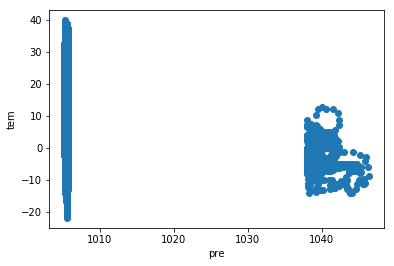

In [ ]:
plt.plot(df['Pressure (millibars)'],df['Temperature (C)'],'o')
plt.xlabel("pre")
plt.ylabel("tem")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=df['Temperature (C)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.4347934649888881


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x=df[['Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=df['Temperature (C)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8674263501483203


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 2.3948250647354703
MSE: 12.140557547641539
R2 Score: 0.8674263501483201


In [ ]:
xx=[.78,13.74,1014.24]
xy=np.array([xx])
print(model.predict(xy))

[16.37777778]
